# Electricity

## initializing dataset

In [115]:
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [116]:
df = pd.read_csv("/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_6/task3/electricity.csv")

/var/folders/21/07m86yd55y193jhyr9vsmzqh0000gp/T/ipykernel_1516/3858495130.py:1: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_6/task3/electricity.csv")


In [117]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [119]:
# List of columns to convert
cols_to_float = [
    "ForecastWindProduction", "SystemLoadEA", "SMPEA",
    "ORKTemperature", "ORKWindspeed", "CO2Intensity",
    "ActualWindProduction", "SystemLoadEP2", "SMPEP2"
]

# Convert to float
df[cols_to_float] = df[cols_to_float].apply(pd.to_numeric, errors='coerce')

# Check conversion
print(df[cols_to_float].dtypes)



ForecastWindProduction    float64
SystemLoadEA              float64
SMPEA                     float64
ORKTemperature            float64
ORKWindspeed              float64
CO2Intensity              float64
ActualWindProduction      float64
SystemLoadEP2             float64
SMPEP2                    float64
dtype: object


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 1536 non-null   object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38009 non-null  float64
 10  SystemLoadEA            38012 non-null  float64
 11  SMPEA                   38012 non-null  float64
 12  ORKTemperature          37719 non-null  float64
 13  ORKWindspeed            37715 non-null  float64
 14  CO2Intensity            38007 non-null

In [121]:
df.isna().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        5
SystemLoadEA                  2
SMPEA                         2
ORKTemperature              295
ORKWindspeed                299
CO2Intensity                  7
ActualWindProduction          5
SystemLoadEP2                 2
SMPEP2                        2
dtype: int64

In [122]:
df = df.loc[df["SMPEP2"] < 100]

## Dealing with na

In [123]:
df = df.iloc[:, 2:18]
df

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


In [124]:
df.dropna(inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34351 entries, 0 to 38013
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HolidayFlag             34351 non-null  int64  
 1   DayOfWeek               34351 non-null  int64  
 2   WeekOfYear              34351 non-null  int64  
 3   Day                     34351 non-null  int64  
 4   Month                   34351 non-null  int64  
 5   Year                    34351 non-null  int64  
 6   PeriodOfDay             34351 non-null  int64  
 7   ForecastWindProduction  34351 non-null  float64
 8   SystemLoadEA            34351 non-null  float64
 9   SMPEA                   34351 non-null  float64
 10  ORKTemperature          34351 non-null  float64
 11  ORKWindspeed            34351 non-null  float64
 12  CO2Intensity            34351 non-null  float64
 13  ActualWindProduction    34351 non-null  float64
 14  SystemLoadEP2           34351 non-null  flo

In [126]:
df.isna().sum()

HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

## Scale the training and test features

In [127]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = [
    "ForecastWindProduction", "SystemLoadEA", "SMPEA", "ORKTemperature", "ORKWindspeed",
    "CO2Intensity", "ActualWindProduction", "SystemLoadEP2"
]
scaler = StandardScaler()

# Fit and transform the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

## Splitting into train and test

In [128]:
X = df.iloc[:, 0:15]
X

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2
0,0,1,44,1,11,2011,0,-0.552171,-0.657443,-0.393612,-0.840546,-1.038562,1.378327,-0.440876,-0.666974
1,0,1,44,1,11,2011,1,-0.536517,-0.891373,-0.393612,-0.840546,-0.851204,1.432486,-0.544136,-0.899844
2,0,1,44,1,11,2011,2,-0.520187,-1.056917,-0.400745,-1.066659,-0.851204,1.254833,-0.560022,-1.073333
3,0,1,44,1,11,2011,3,-0.503230,-1.197134,-0.448000,-0.840546,-1.038562,1.208493,-0.554726,-1.208132
4,0,1,44,1,11,2011,4,-0.485621,-1.314300,-1.085059,-0.840546,-0.851204,1.042684,-0.467353,-1.295931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,1,1,1,31,12,2013,43,1.531474,0.004309,-1.051177,-0.840546,0.304172,-2.248329,0.766469,-0.001338
38010,1,1,1,31,12,2013,44,1.466034,-0.130586,-1.081492,-1.066659,0.501939,-2.328819,0.872377,-0.153535
38011,1,1,1,31,12,2013,45,1.397675,-0.248982,-1.174220,-1.292773,0.116814,-2.298922,1.163622,-0.291704
38012,1,1,1,31,12,2013,46,1.326687,-0.353764,-1.081492,-1.066659,-0.466079,-2.051128,1.131850,-0.162284


In [129]:
y = df.iloc[:, 15]
y

0        54.32
1        54.23
2        54.23
3        53.47
4        39.87
         ...  
38009    42.45
38010    33.83
38011    31.75
38012    50.60
38013    34.90
Name: SMPEP2, Length: 34351, dtype: float64

## splitting the data into train and test sets


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Regression

## Training the Model

In [131]:
'''
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print(y_test_log)
'''

'\ny_train_log = np.log1p(y_train)\ny_test_log = np.log1p(y_test)\n\nprint(y_test_log)\n'

In [132]:
model = tf.keras.Sequential([

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer='adam',
    metrics=['mae']
)

model.fit(X_train, y_train, epochs=100)

y_pred = model.predict(X_test).ravel()

Epoch 1/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step - loss: 12.2347 - mae: 12.2347
Epoch 2/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 10.6116 - mae: 10.6116
Epoch 3/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 9.7632 - mae: 9.7632
Epoch 4/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 9.5762 - mae: 9.5762
Epoch 5/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 9.3489 - mae: 9.3489
Epoch 6/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 9.3951 - mae: 9.3951
Epoch 7/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 9.3064 - mae: 9.3064
Epoch 8/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 9.2670 - mae: 9.2670
Epoch 9/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 9.1027 - mae: 9.1027
Epoch 10/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 9.1260 - mae: 9.1260
Epoch 11/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 9.1093 - mae: 9.1093
Epoch 12/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 9.0733

In [133]:
lr = LinearRegression()
lr.fit(X_train, y_train)
library_pred = lr.predict(X_test).ravel()

In [134]:
print("for scikitlearn Library = ", r2_score(y_test, library_pred))
print(r2_score(y_test, y_pred))

for scikitlearn Library =  0.4526515963417215
0.5212976303689245


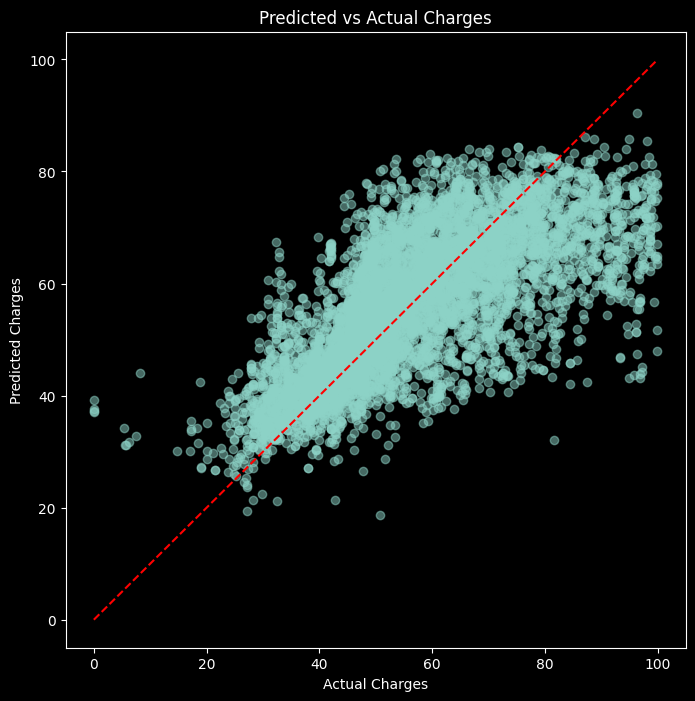

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()


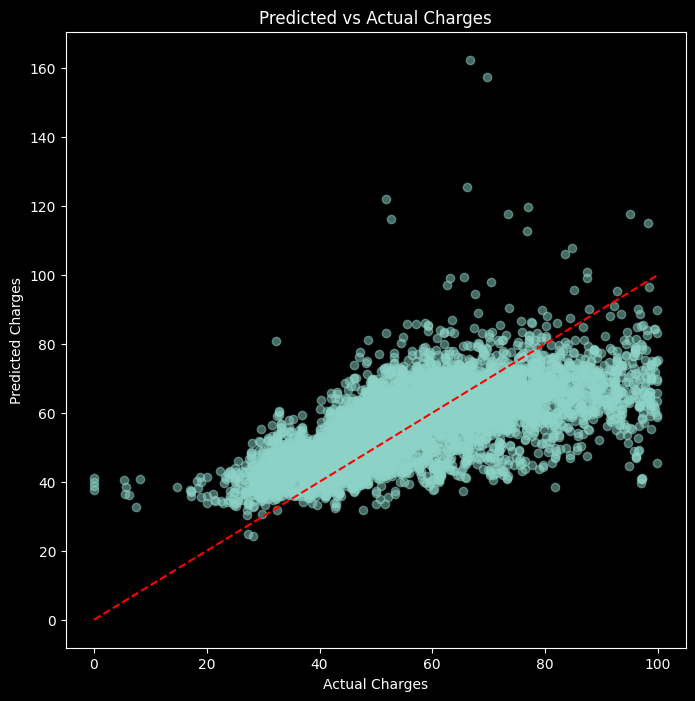

In [136]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, library_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()

In [137]:
X_train

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2
9157,0,2,19,9,5,2012,39,-0.442179,0.572226,0.514051,-0.388318,0.501939,-0.341977,-0.184050,0.830461
34703,0,3,43,24,10,2013,1,-0.840924,-0.873168,-1.081938,-0.162205,-1.236329,0.001831,-0.951879,-0.807041
3352,0,0,2,9,1,2012,40,-0.513891,1.932370,0.343307,-0.388318,-1.038562,0.972082,-0.435581,1.720743
7894,0,4,15,13,4,2012,24,-1.238390,0.745381,2.324027,-0.162205,-0.466079,0.836514,-1.269602,1.279564
6706,1,0,12,19,3,2012,34,0.903508,0.705599,0.031688,0.063909,0.304172,-0.626567,1.110668,0.442773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4190,0,4,4,27,1,2012,14,0.273129,0.129353,-0.748028,-1.745000,-0.268311,0.654376,0.361373,0.516607
33683,0,2,40,2,10,2013,37,1.130245,0.932734,0.554619,1.420591,1.459548,-0.704068,1.190099,1.124784
5801,0,2,9,29,2,2012,41,0.379238,1.587302,0.494435,-0.162205,-0.268311,0.077147,-0.072847,1.377522
30095,0,5,29,20,7,2013,1,-0.933838,-1.051669,-0.788597,1.872818,-1.038562,1.594616,-0.636805,-1.018008


# Decision Tree

In [138]:
import xgboost as xgb

# DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train regression model
model_xgboost = xgb.train(
    params={"objective": "reg:squarederror", "eval_metric": "mae"},
    dtrain=dtrain,
    num_boost_round=100,
    evals=[(dtrain, "train"), (dtest, "test")],

)


[0]	train-mae:11.17859	test-mae:11.23826
[1]	train-mae:9.94417	test-mae:9.97763
[2]	train-mae:9.16077	test-mae:9.19120
[3]	train-mae:8.67595	test-mae:8.72195
[4]	train-mae:8.32490	test-mae:8.39843
[5]	train-mae:8.06757	test-mae:8.17000
[6]	train-mae:7.88233	test-mae:7.99680
[7]	train-mae:7.68286	test-mae:7.83961
[8]	train-mae:7.56151	test-mae:7.75304
[9]	train-mae:7.44259	test-mae:7.66612
[10]	train-mae:7.31608	test-mae:7.56905
[11]	train-mae:7.24684	test-mae:7.51752
[12]	train-mae:7.10828	test-mae:7.39331
[13]	train-mae:7.03096	test-mae:7.34212
[14]	train-mae:6.94161	test-mae:7.25661
[15]	train-mae:6.90074	test-mae:7.22040
[16]	train-mae:6.86658	test-mae:7.20691
[17]	train-mae:6.82097	test-mae:7.17365
[18]	train-mae:6.76378	test-mae:7.13505
[19]	train-mae:6.69596	test-mae:7.07668
[20]	train-mae:6.61389	test-mae:7.00536
[21]	train-mae:6.55231	test-mae:6.95510
[22]	train-mae:6.51157	test-mae:6.92648
[23]	train-mae:6.45940	test-mae:6.88678
[24]	train-mae:6.41883	test-mae:6.86891
[25]	tra

In [139]:
y_pred_xg = model_xgboost.predict(dtest)
print(r2_score(y_test, y_pred_xg))

0.7817520000353066


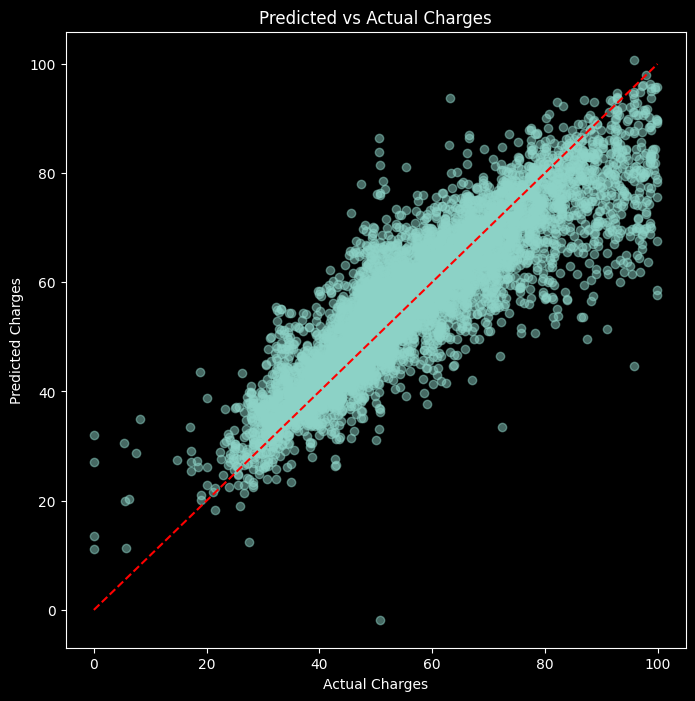

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_xg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()